In [3]:
import pandas as pd
import os
os.listdir()
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


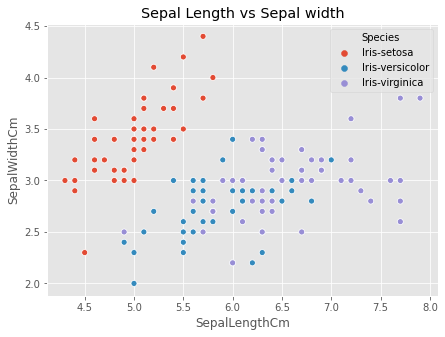

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize = (7,5))
sns.scatterplot(data = df,x = "SepalLengthCm",y="SepalWidthCm",hue = "Species" )
plt.title("Sepal Length vs Sepal width")
plt.show()

In [46]:
x = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']
Y = [1 if i=='Iris-setosa' else 2 if i== 'Iris-versicolor' else 3 for i in y]


(150, 4)


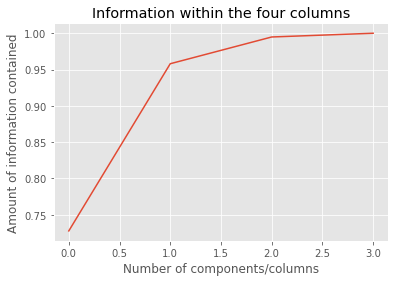

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
# scale the data
scale = StandardScaler()
scaled_data = scale.fit_transform(x)

# pca
pca = PCA()
pca_data = pca.fit_transform(scaled_data)
components = np.cumsum(pca.explained_variance_ratio_)
plt.figure()
plt.plot(components)
plt.title("Information within the four columns")
plt.xlabel("Number of components/columns")
plt.ylabel("Amount of information contained")
plt.show()

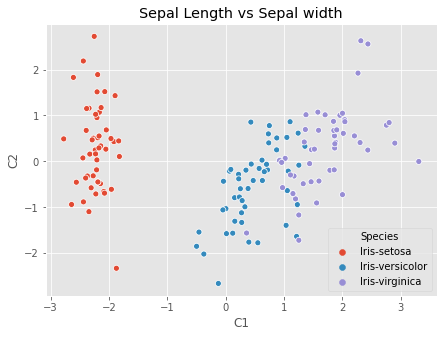

In [38]:
data = pd.DataFrame(pca_data,columns = ['C1','C2','C3','C4'])
data['Species'] = y
plt.figure(figsize = (7,5))
sns.scatterplot(data = data,x = "C1",y="C2",hue = "Species" )
plt.title("Sepal Length vs Sepal width")
plt.show()

In [35]:
data.head()

,C1,C2,C3,C4,Species
0,-2.264542,0.505704,-0.121943,-0.023073,Species
1,-2.086426,-0.655405,-0.227251,-0.103208,Species
2,-2.367950,-0.318477,0.051480,-0.027825,Species
3,-2.304197,-0.575368,0.098860,0.066311,Species
4,-2.388777,0.674767,0.021428,0.037397,Species


In [41]:
def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature-1",fontsize=15)
    plt.ylabel("Feature-2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

In [53]:
x = data[['C1','C2','C3','C4']]
y = data['Species']
Y = [1 if i=='Iris-setosa' else 2 if i== 'Iris-versicolor' else 3 for i in y]

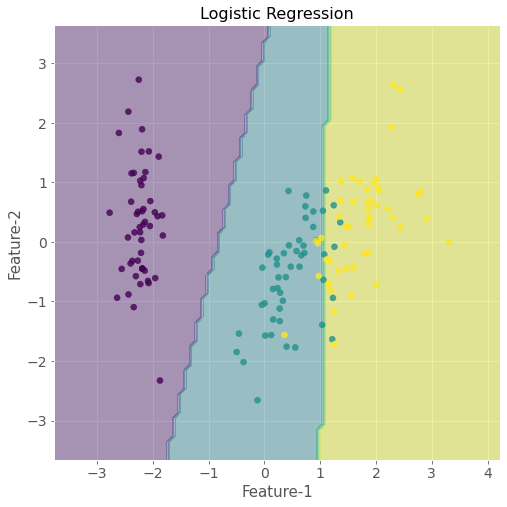

In [54]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

plt.figure(figsize=(8,8))
plt.title("Logistic Regression",fontsize=16)
plot_decision_boundaries(x,Y,LogisticRegression)
plt.savefig("KNN.jpg")
plt.show()

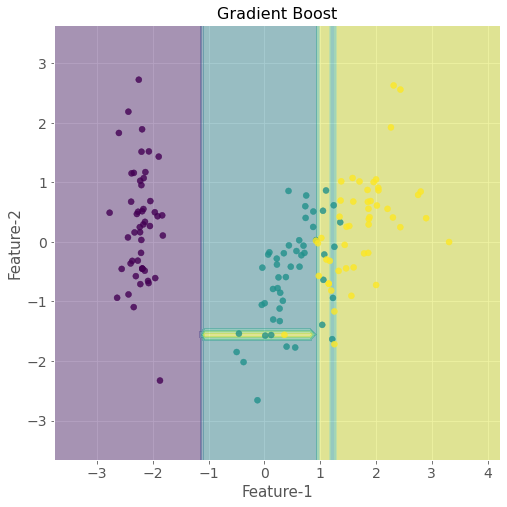

In [57]:
# Gradient Boost Classification

from sklearn.ensemble import GradientBoostingClassifier

plt.figure(figsize=(8,8))
plt.title("Gradient Boost",fontsize=16)
plot_decision_boundaries(x,Y,GradientBoostingClassifier)
plt.savefig("KNN.jpg")
plt.show()

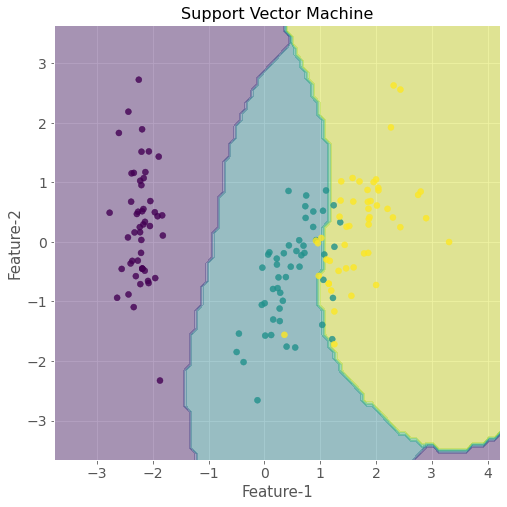

In [59]:

from sklearn.svm import SVC

plt.figure(figsize=(8,8))
plt.title("Support Vector Machine",fontsize=16)
plot_decision_boundaries(x,Y,SVC)
plt.savefig("KNN.jpg")
plt.show()

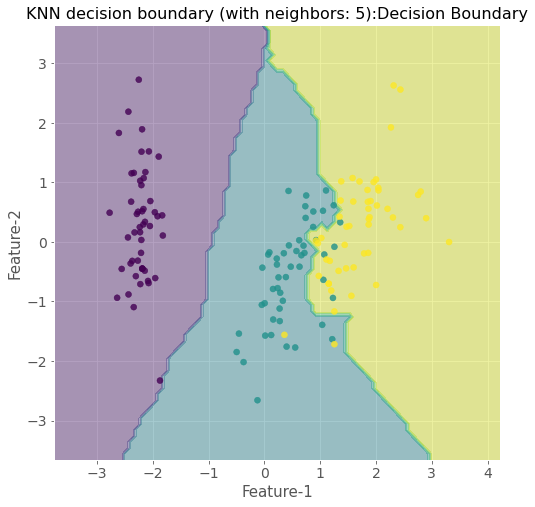

In [62]:
from sklearn.neighbors import KNeighborsClassifier
plt.figure(figsize=(8,8))
plt.title("KNN decision boundary (with neighbors: 5):Decision Boundary",fontsize=16)
plot_decision_boundaries(x,Y,KNeighborsClassifier,n_neighbors=5)
plt.savefig("KNN.jpg")
plt.show()